In [ ]:
import pandas as pd

train_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/train3000.xlsx")
test_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/test1000.xlsx")


In [ ]:
!pip install -q konlpy tqdm

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 71.0 MB/s 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

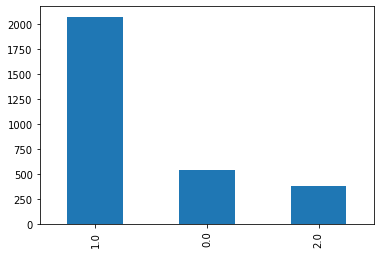

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name='count'))
print(test_data.groupby('label').size().reset_index(name='count'))

   label  count
0    0.0    542
1    1.0   2076
2    2.0    379
   label  count
0    0.0    155
1    1.0    760
2    2.0     82


In [ ]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = []
for sentence in train_data['comment']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)
  
X_test = []
for sentence in test_data['comment']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

In [ ]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

제목의 최대 길이 :  154
제목의 평균 길이 :  12.458666666666666


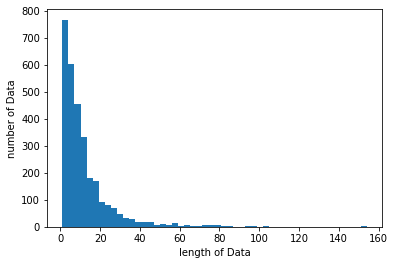

In [ ]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  150
제목의 평균 길이 :  11.647


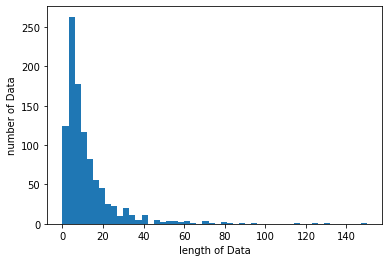

In [ ]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [ ]:
import numpy as np

y_train = []
y_test = []



for i in range(len(train_data['label'])):
  if train_data['label'].iloc[i] == 1:
    y_train.append([0, 0, 1])
  elif train_data['label'].iloc[i] == 0:
    y_train.append([0, 1, 0])
  elif train_data['label'].iloc[i] == -1:
    y_train.append([1, 0, 0])

for i in range(len(test_data['label'])):
  if test_data['label'].iloc[i] == 1:
    y_test.append([0, 0, 1])
  elif test_data['label'].iloc[i] == 0:
    y_test.append([0, 1, 0])
  elif test_data['label'].iloc[i] == -1:
    y_test.append([1, 0, 0])

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_train = pad_sequences(X_test, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
90/90 [==============================] - 9s 16ms/step - loss: 0.5968 - accuracy: 0.7522 - val_loss: 0.5372 - val_accuracy: 0.8100
Epoch 2/10
90/90 [==============================] - 0s 5ms/step - loss: 0.5519 - accuracy: 0.7611 - val_loss: 0.4858 - val_accuracy: 0.8100
Epoch 3/10
90/90 [==============================] - 1s 6ms/step - loss: 0.5072 - accuracy: 0.7744 - val_loss: 0.5026 - val_accuracy: 0.8100
Epoch 4/10
90/90 [==============================] - 0s 5ms/step - loss: 0.3989 - accuracy: 0.8267 - val_loss: 0.6113 - val_accuracy: 0.7900
Epoch 5/10
90/90 [==============================] - 1s 6ms/step - loss: 0.2907 - accuracy: 0.8922 - val_loss: 0.7158 - val_accuracy: 0.7100
Epoch 6/10
90/90 [==============================] - 0s 5ms/step - loss: 0.1965 - accuracy: 0.9289 - val_loss: 0.7707 - val_accuracy: 0.7100
Epoch 7/10
90/90 [==============================] - 0s 5ms/step - loss: 0.1454 - accuracy: 0.9478 - val_loss: 0.9451 - val_accuracy: 0.6500
Epoch 8/10
90/90 [=

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
90/90 [==============================] - 4s 22ms/step - loss: 0.6260 - accuracy: 0.7522 - val_loss: 0.5081 - val_accuracy: 0.8100
Epoch 2/10
90/90 [==============================] - 2s 17ms/step - loss: 0.5292 - accuracy: 0.7600 - val_loss: 0.5193 - val_accuracy: 0.8100
Epoch 3/10
90/90 [==============================] - 1s 6ms/step - loss: 0.3859 - accuracy: 0.8278 - val_loss: 0.7176 - val_accuracy: 0.7300
Epoch 4/10
90/90 [==============================] - 1s 6ms/step - loss: 0.2072 - accuracy: 0.9278 - val_loss: 0.8919 - val_accuracy: 0.7800
Epoch 5/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1151 - accuracy: 0.9578 - val_loss: 1.2287 - val_accuracy: 0.6800
Epoch 6/10
90/90 [==============================] - 1s 6ms/step - loss: 0.0801 - accuracy: 0.9700 - val_loss: 1.2257 - val_accuracy: 0.7100
Epoch 7/10
90/90 [==============================] - 1s 7ms/step - loss: 0.0715 - accuracy: 0.9756 - val_loss: 1.3495 - val_accuracy: 0.7200
Epoch 8/10
90/90 [

In [ ]:
predict = model.predict(X_test)

In [ ]:
import numpy as np
predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [ ]:
for i in range(30):
  print("댓글 : ", test_data['comment'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])

댓글 :    스브스 진짜 땅을 치고 후회할 듯    이 띵작을 거절한다고        /	 원래 라벨 :  2 /	예측한 라벨 :  2
댓글 :    아버지가 한바다 찾아갔을때 대표한테 말함 /	 원래 라벨 :  2 /	예측한 라벨 :  1
댓글 :    그해우리는 나온게 신기함 /	 원래 라벨 :  1 /	예측한 라벨 :  2
댓글 :                뭐여 이건 국뽕 부작용인가  /	 원래 라벨 :  2 /	예측한 라벨 :  2
댓글 :    연기력 미쳤다                   /	 원래 라벨 :  2 /	예측한 라벨 :  2
댓글 :    너무 이쁘고 귀엽고 매력적임데이트때마다 김초밥만 먹어도 좋을듯 /	 원래 라벨 :  1 /	예측한 라벨 :  1
댓글 :            하버드 수석을 한 일반 비 장애인  변호사가 사직서를 낸다면 과연 정명석 변호사는 수리를 할까요  안 할까요  우영우보다 능력이 훨씬 좋을텐데 저는 바로 짤린다고 봅니다 상사한테 말도 제대로 안하고 연락까지 안 받는다면요 /	 원래 라벨 :  1 /	예측한 라벨 :  1
댓글 :     하이루  다른나라에서도 좋다고요      다른나라에서도 레디컬 페미니즘이나 페미나치 많이 나와서 거부감 심해요     특히 미국 /	 원래 라벨 :  1 /	예측한 라벨 :  2
댓글 :         저기 앞에 불법주차나 못하게 해 /	 원래 라벨 :  1 /	예측한 라벨 :  2
댓글 :    아 썸네일 스포뭔데        /	 원래 라벨 :  2 /	예측한 라벨 :  1
댓글 :                   상세한설명 감사합니다 /	 원래 라벨 :  2 /	예측한 라벨 :  2
댓글 :     피즈멍       /	 원래 라벨 :  2 /	예측한 라벨 :  1
댓글 :    권모술수 권영우 밉짠 /	 원래 라벨 :  2 /	예측한 라벨 :  2
댓글 :    저렇게 많은 자료들을 머릿속에 저장하고 다니면서 재판에 바로 써먹는거 보면 누가봐도 빽이 아니라 영우 본인의 